<a href="https://colab.research.google.com/github/AmirMohammadiKarbalaei/YOLO5-computer-vision/blob/main/First_CV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


**YOLO**

In [ ]:
yolo = cv2.dnn.readNet( "./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [ ]:
classes = []
with open("./coco.names.txt","r") as f:
  classes = f.read().splitlines()

In [ ]:
len(classes)

80

In [ ]:
classes

In [ ]:
img = cv2.imread("./photo 3.jpg")
blob = cv2.dnn.blobFromImage(img,1/255,(800,800),(0,0,0), swapRB = True, crop = False)

In [ ]:
blob.shape

(1, 3, 800, 800)

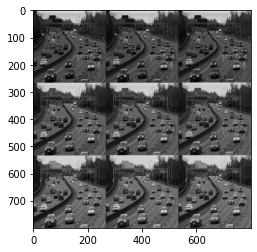

In [ ]:
#to print image

i = blob[0].reshape(800,800,3)
plt.imshow(i)

In [ ]:
yolo.setInput(blob)
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [ ]:
Width = img.shape[1]
Height = img.shape[0]
boxes = []
confidences = []
class_ids = []
Width = img.shape[1]
Height = img.shape[0]
for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.4:
      centre_X = int(detection[0]*Width)
      centre_y = int(detection[1]*Height)

      w = int(detection[2]*Width)
      h = int(detection[3]*Height)

      x = int(centre_X - w/2)
      y = int(centre_y - w/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [ ]:
len(boxes)  

49

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences ,0.5,0.4 )

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255 , size = (len(boxes),3) )

In [ ]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i], 2))
  color = colors[i]

  cv2.rectangle(img,(x,y),(x+w, y+h), color, 2)
  cv2.putText(img, label +" " + confi, (x,y+20), font , 2, (255,255,255), 1)

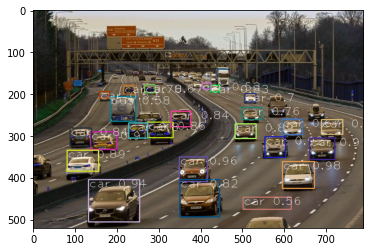

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imwrite("./img 2.3.jpg", img)

True